# Visualizing SVD

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import math

In [3]:
# matrix multiplication dah ada
def matrix_multiplication(a,b):
    if len(a[0]) != len(b):
        return ValueError("matrix must be MxN x NxP")
    
    resMatrix = []
    for i in range(len(a)):
        tmp = []
        for j in range(len(b[0])):
            res = 0
            for k in range(len(b)):
                res += a[i][k] * b[k][j]
            
            tmp.append(res)
        resMatrix.append(tmp)

    return resMatrix

# find matrix transpose
def transpose_matrix(matrix):
    if not hasattr(matrix[0], '__len__'):
        return TypeError("must be a MxN matrix!")

    newmatrix = []
    for i in range(len(matrix[0])):
        tmp = []
        for j in range(len(matrix)):
            tmp.append(matrix[j][i])

        newmatrix.append(tmp)

    return newmatrix

# compute eigenvalues
def compute_eigenvalues_2x2(A):
    # A is a 2x2 matrix [[a, b], [c, d]]
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]
    
    # Characteristic equation: λ^2 - (a + d)λ + (ad - bc) = 0
    trace = a + d  # This is (a + d)
    determinant = a * d - b * c  # This is (ad - bc)
    
    # Solving the quadratic equation: λ = [-trace ± sqrt(trace^2 - 4*determinant)] / 2
    discriminant = trace**2 - 4 * determinant
    eigenvalue1 = (trace + math.sqrt(discriminant)) / 2
    eigenvalue2 = (trace - math.sqrt(discriminant)) / 2
    
    return eigenvalue1, eigenvalue2

# compute eigenvector
# this function returns an eigenvector that
# does not make the reconstruction of the matrix
# equal to the original
def compute_eigenvector_2x2(A, eigenvalue1, eigenvalue2):
    # A is a 2x2 matrix [[a, b], [c, d]]
    a, b = A[0][0], A[0][1]
    c, d = A[1][0], A[1][1]

    eigenvector1 = []
    eigenvector2 = []

    # Calculate eigenvectors manually
    # For the first eigenvalue (lambda_1):
    if b != 0:
        eigenvector1 = np.array([eigenvalue1 - d, b])
    else:
        eigenvector1 = np.array([c, eigenvalue1 - a])
    eigenvector1 = eigenvector1 / np.linalg.norm(eigenvector1)  # Normalize the vector

    # second eigenvalue
    if b != 0:
        eigenvector2 = np.array([eigenvalue2 - d, b])
    else:
        eigenvector2 = np.array([c, eigenvalue2 - a])
    eigenvector2 = eigenvector2 / np.linalg.norm(eigenvector2)  # Normalize the vector
    
    return [eigenvector1, eigenvector2]

# Function to manually compute eigenvalues and eigenvectors for a 2x2 matrix
def manual_eigen_2x2(matrix):
    # The matrix is of the form [[a, b], [c, d]]
    a, b, c, d = matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1]
    
    # Calculate the discriminant of the characteristic equation
    trace = a + d
    determinant = a * d - b * c
    discriminant = trace ** 2 - 4 * determinant
    
    # Eigenvalues are given by the quadratic formula
    eigenvalue_1 = (trace + np.sqrt(discriminant)) / 2
    eigenvalue_2 = (trace - np.sqrt(discriminant)) / 2
    
    # Calculate eigenvectors manually
    # For the first eigenvalue (lambda_1):
    if b != 0:
        eigenvector_1 = np.array([eigenvalue_1 - d, b])
    else:
        eigenvector_1 = np.array([c, eigenvalue_1 - a])
    eigenvector_1 = eigenvector_1 / np.linalg.norm(eigenvector_1)  # Normalize the vector

    # For the second eigenvalue (lambda_2):
    if b != 0:
        eigenvector_2 = np.array([eigenvalue_2 - d, b])
    else:
        eigenvector_2 = np.array([c, eigenvalue_2 - a])
    eigenvector_2 = eigenvector_2 / np.linalg.norm(eigenvector_2)  # Normalize the vector

    return np.array([eigenvalue_1, eigenvalue_2]), np.array([eigenvector_1, eigenvector_2]).T

def svd_2x2(A):
    # find A Transpose
    A_transpose = transpose_matrix(A)
    
    # calculate AT A
    A_transpose_A = matrix_multiplication(A_transpose,A)

    A_transpose_A = np.array(A_transpose_A)

    # Step 2: Find eigenvalues and eigenvectors of A^T A using the manual function
    eigenvalues, Vt = manual_eigen_2x2(A_transpose_A)
    
    # Step 3: Calculate singular values (sqrt of eigenvalues)
    singular_values = np.sqrt(eigenvalues)

    # Step 4: Construct the Sigma matrix (diagonal matrix with singular values)
    Sigma = np.diag(singular_values)
    
    # Step 5: Calculate U as A * V * Sigma^-1
    U = np.dot(A, np.dot(Vt, np.linalg.inv(Sigma)))
    
    return U, singular_values, Sigma, Vt

def draw_vector(ax, vector, color='black', label=None):
    ax.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color)
    if label:
        ax.text(vector[0], vector[1], label, fontsize=12, color=color)

def plot_svd_visualization(circle_points, transformed_points, sigma_transformed, U_matrix, V_transposed, singular_values):
    fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # 4 plots side by side
 
    # Step 1: Plot the original circle and vectors v1, v2 (before transformation)
    axs[0].plot(circle_points[0, :], circle_points[1, :], color='blue')
    axs[0].axhline(0, color='black', linewidth=0.5)
    axs[0].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[0], V_transposed[:, 0], color='red', label='$v_1$')
    draw_vector(axs[0], V_transposed[:, 1], color='green', label='$v_2$')
    axs[0].set_title('Matrix $A$')
    axs[0].set_aspect('equal')
 
    # Step 2: After applying V^T (rotate the circle)
    axs[1].plot(transformed_points[0, :], transformed_points[1, :], color='blue')
    axs[1].axhline(0, color='black', linewidth=0.5)
    axs[1].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[1], [1, 0], color='red', label='x-axis')  # Transformed X-axis
    draw_vector(axs[1], [0, 1], color='green', label='y-axis')  # Transformed Y-axis
    axs[1].set_title("After $V^{T}$ (Rotation)")
    axs[1].set_aspect('equal')
 
    # Step 3: After applying Σ (scale the circle)
    axs[2].plot(sigma_transformed[0, :], sigma_transformed[1, :], color='blue')
    axs[2].axhline(0, color='black', linewidth=0.5)
    axs[2].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[2], [singular_values[0], 0], color='red', label='$σ_1$')
    draw_vector(axs[2], [0, singular_values[1]], color='green', label='$σ_2$')
    axs[2].set_title('After $\Sigma$ (Scaling)')
    axs[2].set_aspect('equal')
 
    # Step 4: After applying U (final transformation)
    U_transformed = U_matrix @ sigma_transformed
    axs[3].plot(U_transformed[0, :], U_transformed[1, :], color='blue')
    axs[3].axhline(0, color='black', linewidth=0.5)
    axs[3].axvline(0, color='black', linewidth=0.5)
    draw_vector(axs[3], U_matrix[:, 0] * singular_values[0], color='red', label='$σ_1 u_1$')
    draw_vector(axs[3], U_matrix[:, 1] * singular_values[1], color='green', label='$σ_2 u_2$')
    axs[3].set_title("After $U$ (Final Transformation)")
    axs[3].set_aspect('equal')
 
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
 
def create_sigma_matrix(sigma):
    return [[sigma[0], 0], [0, sigma[1]]]

# Function to reconstruct matrix A from U, Sigma, V^T
def reconstruct_matrix(U, Sigma, V):
    # First, compute Sigma * V^T
    V_transpose = transpose_matrix(V)
    Sigma_VT = matrix_multiplication(Sigma, V_transpose)

    # Now, compute U * (Sigma * V^T)
    reconstructed_A = matrix_multiplication(U, Sigma_VT)

    return reconstructed_A


In [4]:
# Define the matrix A
A = [[2, 3],
    [3, 2]]

# Perform SVD without using numpy's eig or SVD
U, singular, Sigma, V = svd_2x2(A)

A_reconstructed = U @ Sigma @ V.T

print("Original matrix A:\n", A)
print("Matrix U ", U)
print("Matrix Sigma ", Sigma)
print("Matrix VT ", V.T)
print("Reconstructed matrix A:\n", A_reconstructed)

Original matrix A:
 [[2, 3], [3, 2]]
Matrix U  [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Matrix Sigma  [[5. 0.]
 [0. 1.]]
Matrix VT  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Reconstructed matrix A:
 [[2. 3.]
 [3. 2.]]


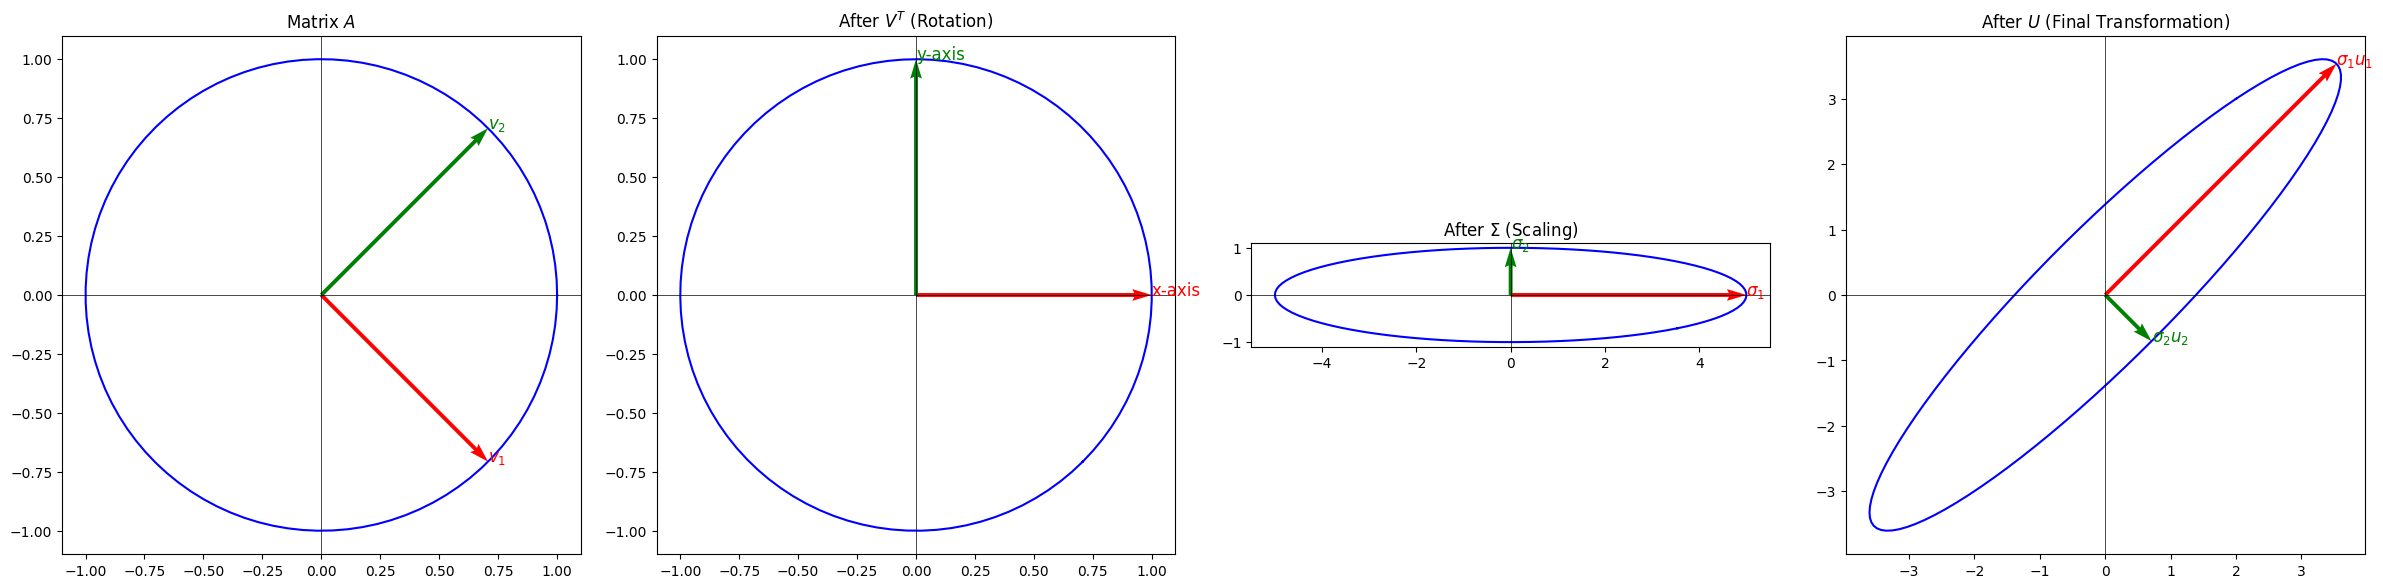

In [5]:

# Create a unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])  # Parametric equation for a unit circle

# Apply transformations in steps
circle_rotated_by_VT = V.T @ circle               # Rotate the unit circle by V^T
ellipse_scaled = Sigma @ circle_rotated_by_VT  # Scale by Sigma
final_transformation = U @ ellipse_scaled           # Apply U to the scaled ellipse

plot_svd_visualization(
    circle,
    circle_rotated_by_VT,
    ellipse_scaled,
    U,
    V.T,
    singular
)